In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [9]:
# Set URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_key 

# Create city list
city_data = []

# Create record count
record_count = 1

# Loop through each city
for i, city in enumerate(cities):

    # Complete endpoint URL
    city_url = url + "&q=" + city
    
    # Print each city as it's being processed with record number
    print(record_count, city)

    # Add 1 to the record count
    record_count += 1

    # Perform a weather check on each city using a series of successive API calls
    try:
    
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind Speed": city_wind, "Country": city_country, "Date": city_date})

    # Skip any errors
    except:
        pass
              

1 general pico
2 timbiras
3 rikitea
4 mataura
5 tasiilaq
6 kapaa
7 attawapiskat
City not found...
8 lima duarte
9 grand gaube
10 plouzane
11 kodiak
12 bredasdorp
13 dolbeau
City not found...
14 port elizabeth
15 wagar
16 suntar
17 korla
18 arrifes
19 ostrovnoy
20 maralal
21 gat
22 punta arenas
23 port alfred
24 parati
25 thompson
26 cherskiy
27 ushuaia
28 hilo
29 cape town
30 lorengau
31 northam
32 beipiao
33 chapais
34 barrow
35 geraldton
36 clearwater
37 daru
38 say
39 cap malheureux
40 tiksi
41 kazalinsk
City not found...
42 tuktoyaktuk
43 tynda
44 georgetown
45 khatanga
46 vestmannaeyjar
47 cairns
48 westport
49 vila franca do campo
50 hermanus
51 hamilton
52 mpanda
53 taolanaro
City not found...
54 los llanos de aridane
55 lamu
56 vaini
57 saint-philippe
58 castro
59 saint anthony
60 albany
61 illoqqortoormiut
City not found...
62 omsukchan
63 mahebourg
64 rocha
65 provideniya
66 tuatapere
67 hasaki
68 new norfolk
69 barentsburg
City not found...
70 huanren
71 hobart
72 naze
73 bu

588 mitsamiouli
589 sucre
590 north bend
591 viseu
592 rawson
593 venice
594 alugan
595 bathsheba
596 codajas
597 lafiagi
598 maputo
599 lensk
600 kegayli
City not found...
601 wahran
City not found...
602 isangel
603 carbonia
604 shar
605 saint-paul
606 tevaitoa
607 iranshahr
608 ormara
609 cunen
610 ararangua
611 kapuskasing
612 bolungarvik
City not found...


In [10]:
# Load the JSONs into a dataframe
city_data_df = pd.DataFrame(city_data)

# Export the city data into a .csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Display the dataframe
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,general pico,-35.66,-63.76,66.97,50,100,19.69,AR,1599585764
1,timbiras,-4.26,-43.94,100.71,26,28,3.60,BR,1599585764
2,rikitea,-23.12,-134.97,71.96,73,68,10.04,PF,1599585785
3,mataura,-46.19,168.86,45.00,72,1,11.01,NZ,1599586041
4,tasiilaq,65.61,-37.64,42.80,52,20,8.05,GL,1599586042


In [12]:
# Set variables for the columns we need for graphing

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

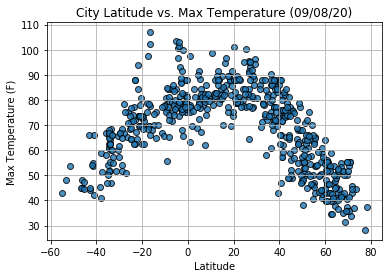

In [14]:
 # Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Add title, axis labels, and date of analysis
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

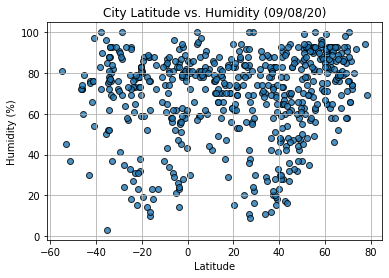

In [15]:
 # Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Add title, axis labels, and date of analysis
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

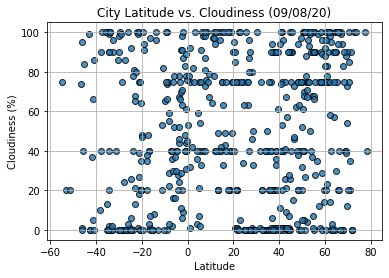

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Add title, axis labels, and date of analysis
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

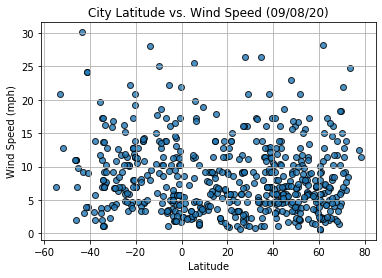

In [17]:
 # Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Add title, axis labels, and date of analysis
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

In [25]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

The r-squared is: -0.7993715638122115


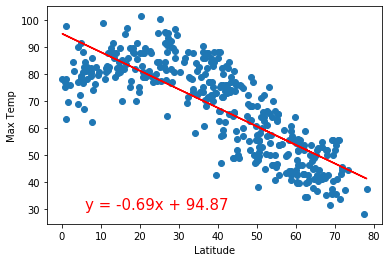

In [27]:
# Northern hemisphere - Max Temp vs Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-squared is: 0.763740533451391


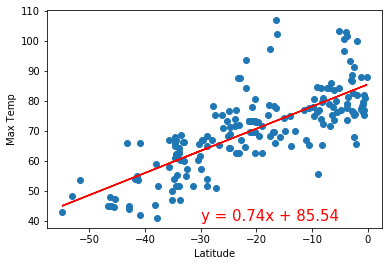

In [28]:
# Southern hemisphere - Max Temp vs Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

The r-squared is: 0.19885362241857435


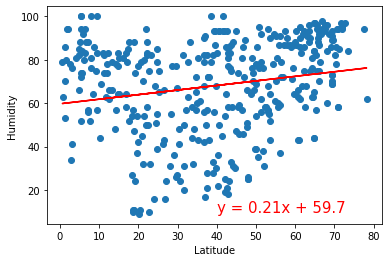

In [24]:
# Northern hemisphere - Humidity vs Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.03557183456226296


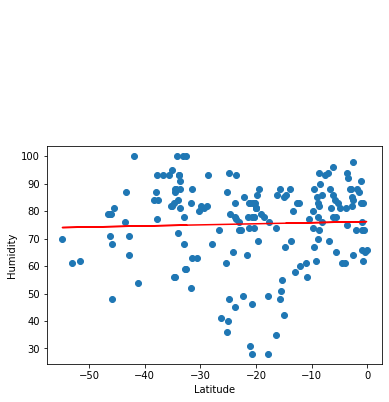

In [25]:
# Southern hemisphere - Humidity vs Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

The r-squared is: 0.13998073210525183


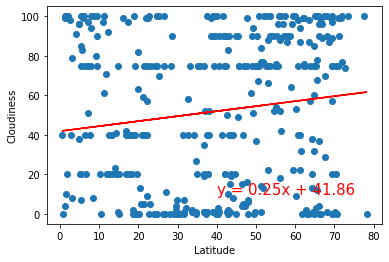

In [26]:
 # Northern Hemisphere - Cloudiness vs Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.08183671055186478


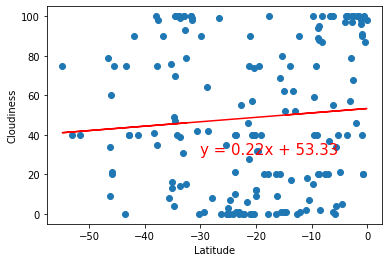

In [27]:
 # Southern Hemisphere - Cloudiness vs Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The r-squared is: 0.07439368225560976


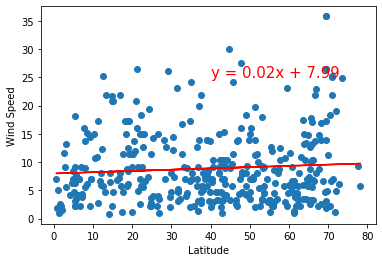

In [28]:
 # Northern Hemisphere - Wind Speed vs Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: -0.2254432105475954


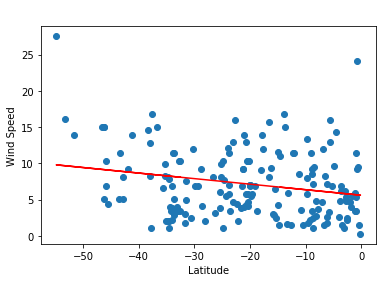

In [29]:
# Southern Hemisphere - Wind Speed vs Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

In [ ]:
# Three Observable Trends: 1) Temperature increases as latitude approaches zero 2) There is no clear relationship between windspeed and latitude 3) There is no clear relationship between cloudiness and latitude